In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn import neighbors
from sklearn import cross_validation
import statsmodels.formula.api as sm

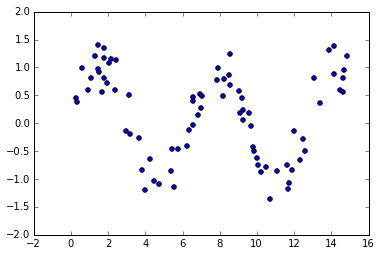

In [2]:
np.random.seed(0)

X = np.sort(15 * np.random.rand(80, 1), axis=0)
T = np.linspace(0, 15, 1000)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y += 1 * (0.5 - np.random.rand(80))
plt.scatter(X,y)

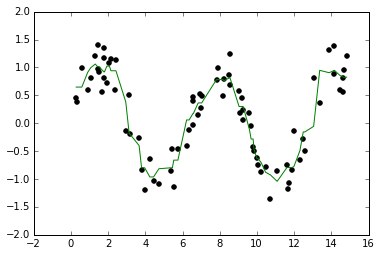

In [3]:
knn = neighbors.KNeighborsRegressor()
y_ = knn.fit(X.reshape(80,1), y).predict(X.reshape(80,1))

plt.scatter(X, y, c='k', label='data')
plt.plot(X, y_, c='g', label='prediction')


In [6]:
advertising = pd.read_csv('https://raw.githubusercontent.com/galvin-mj/DAT_ATL_15/master/Datasets/Advertising.csv')
del advertising['Unnamed: 0']
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
advertising.shape

(200, 4)

In [47]:
train, test =  cross_validation.train_test_split(advertising, train_size=0.8)

In [15]:
train.shape

(160, 4)

In [16]:
test.shape

(40, 4)

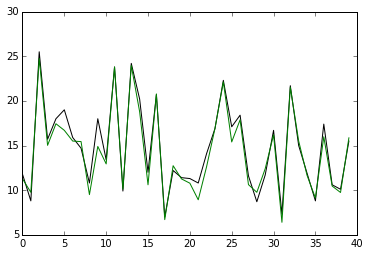

In [56]:
x=train[['TV', 'Radio', 'Newspaper']]
y=train['Sales']

p=test[['TV', 'Radio', 'Newspaper']]
q=test['Sales']


knn = neighbors.KNeighborsRegressor()
y_ = knn.fit(x.values, y.values).predict(p.values)

plt.plot(q, c='k', label='data')
plt.plot(y_, c='g', label='prediction')

coefficient [ 0.04633894  0.19158119 -0.00547976]
intercept 2.89770473479


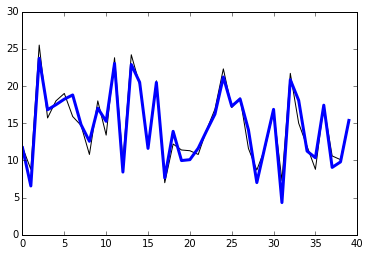

In [65]:
advertising_test = pd.concat([p, q], axis=1)


#model = sm.ols(formula = 'Sales ~ TV + Radio + Newspaper', data = advertising_test)
#results = model.fit()
#print(results.summary())

from sklearn import linear_model
rgr = linear_model.LinearRegression()
rgr.fit(x,y)
print("coefficient {}".format(rgr.coef_))
print("intercept {}".format(rgr.intercept_))

plt.plot(q, c='k', label='data')
plt.plot(rgr.predict(p), color='blue',linewidth=3)

In [40]:
x.shape

(160, 3)

In [41]:
y.shape

(160,)

In [42]:
p.shape

(40, 3)

In [43]:
q.shape

(40,)